In [1]:
import numpy as np 
import os
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import random
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk/000768WA3.jpg
/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk/crop015548WF4.jpg
/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk/007398WB1.jpg
/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk/99.jpgWA7.jpg
/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk/crop000396WA5.jpg
/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk/009259WD4.jpg
/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk/007421WB1.jpg
/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk/007852WC4.jpg
/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk/000770WA3.jpg
/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk/000198WA5.jpg
/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk/015886WF4.jpg
/kaggle/input/sheep-breed-classification/SheepFaceImages/

In [2]:
''' name of directorires '''
os.listdir("../input/sheep-breed-classification/SheepFaceImages")

['White Suffolk', 'Poll Dorset', 'Marino', 'Suffolk']

In [3]:
''' path of following class '''
marino = "/kaggle/input/sheep-breed-classification/SheepFaceImages/Marino/"
whilte_suffolk = "/kaggle/input/sheep-breed-classification/SheepFaceImages/White Suffolk"
poll_dorest = "/kaggle/input/sheep-breed-classification/SheepFaceImages/Poll Dorset"
suffolk = "/kaggle/input/sheep-breed-classification/SheepFaceImages/Suffolk"

In [4]:
''' Creating Dataset '''
X = []
y = []

def dataset(dir_name, breed_name):
    for i in tqdm(os.listdir(dir_name)):
        ''' joining two paths '''
        p = os.path.join(dir_name, i)
        try:
            ''' reading image '''
            img = cv2.imread(p)
            ''' resizing an image '''
            img = cv2.resize(img,(150,150))
        except:
            continue
        ''' appending images to X and labels to y'''
        X.append(img)
        y.append(breed_name)
    return X,y

In [5]:
''' Calling dataset function to create data for earch class '''
X, y = dataset(marino,"Marino")
X, y = dataset(white_sufflok,"White Suffolk")
X, y = dataset(poll_dorset,"Poll Dorset")
X, y = dataset(suffolk,"Suffolk")

100%|██████████| 420/420 [00:00<00:00, 511.70it/s]


In [6]:
''' converting images to numpy'''
X = np.array(X)
y = np.array(y)

''' checking shape of images '''
print(x.shape,y.shape)

(1680, 150, 150, 3) (1680,)


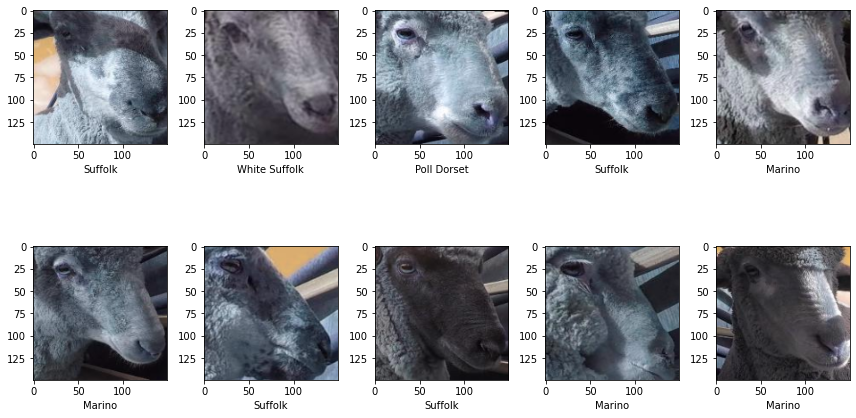

In [7]:
''' plotting some images '''

for i in range(10):
    plt.figure(figsize = (12,7))
    idx = random.randint(0,len(y))
    img = X[idx]
    ''' 2 rows and 5 columns '''
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(img)
    plt.xlabel(y[indx])
plt.tight_layout()
plt.show()
    

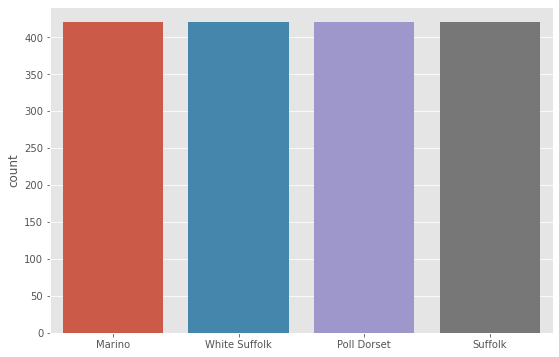

In [8]:
''' barplot of classes '''
plt.style.use("ggplot")
plt.figure(figsize=(9,6))
sns.countplot(y)
plt.show()

In [9]:
''' doing label encoding in class y and conerting it into to_categorical '''
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

In [10]:
''' train teset split '''
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
''' Scaliung '''
size = 150

X_train = np.array(X)/255.0
X_test = np.array(X_test)/255.0

''' reshaping '''
X_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

''' reshaping '''
X_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [12]:
''' Model ResNet50 '''
resnet_model = ResNet50(weights="imagenet", include_top=False, input_shape=(150,150,3))

94773248/94765736 [==============================] - 1s 0us/step


In [13]:
''' freezing layers '''
for l in resnet_model.layers:
    l.trainable = False

In [14]:
''' Final Model '''

''' container '''
model = Sequential()

''' resnet model '''
model.add(resnet_model)

''' flattening input to convert it into 1D'''
model.add(Flatten())

''' classificaion layer '''
model.add(Dense(4,activation = "softmax"))

''' lets see how model looks like '''
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 4)                 204804    
Total params: 23,792,516
Trainable params: 204,804
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
''' EarlyStopping and Checkpoint'''
cp = ModelCheckpoint("resnet50.h5",monitor = "val_accuracy",save_best_only = True,verbose=1)
es = EarlyStopping(monitor="val_accuracy",patience=8,verbose=1)

''' compile the model '''
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [16]:
''' training '''
history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=25, verbose=1, 
                    callbacks = [cp, es])

Epoch 1/25
41/42 [============================>.] - ETA: 0s - loss: 1.6133 - accuracy: 0.3064
Epoch 00001: val_accuracy improved from -inf to 0.39881, saving model to resnet50.h5
42/42 [==============================] - 4s 90ms/step - loss: 1.6050 - accuracy: 0.3080 - val_loss: 1.2942 - val_accuracy: 0.3988
Epoch 2/25
41/42 [============================>.] - ETA: 0s - loss: 1.2709 - accuracy: 0.4139
Epoch 00002: val_accuracy improved from 0.39881 to 0.40476, saving model to resnet50.h5
42/42 [==============================] - 2s 57ms/step - loss: 1.2676 - accuracy: 0.4174 - val_loss: 1.2694 - val_accuracy: 0.4048
Epoch 3/25
41/42 [============================>.] - ETA: 0s - loss: 1.2251 - accuracy: 0.4596
Epoch 00003: val_accuracy did not improve from 0.40476
42/42 [==============================] - 2s 42ms/step - loss: 1.2185 - accuracy: 0.4665 - val_loss: 1.3744 - val_accuracy: 0.3274
Epoch 4/25
41/42 [============================>.] - ETA: 0s - loss: 1.1223 - accuracy: 0.5244
Epoch 

In [19]:
''' evaluaing the model '''
l, acc = model.evaluate(X_test,y_test)
print(f"Loss for resnet50: {l}")
print(f"Accuracy for resnet50: {acc}")

11/11 [==============================] - 0s 31ms/step - loss: 0.8531 - accuracy: 0.7024
Loss for resnet50: 0.8531411290168762
Accuracy for resnet50: 0.7023809552192688


In [20]:
''' prediction '''
y_pred = model.predict_classes(x_test)

''' displaying first 15 preicted values '''
y_pred[:15]

array([1, 3, 3, 2, 3, 1, 3, 3, 0, 2, 3, 2, 0, 3, 2])

In [21]:
y_test_resnet = np.argmax(y_test,axis=1)

''' displaying first 15 actual values '''
y_test_resnet[:15]

array([1, 2, 3, 3, 3, 0, 3, 3, 3, 2, 3, 2, 0, 3, 1])

In [22]:
''' classification report '''
print(classification_report(y_test_resnet,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.23      0.36        82
           1       0.72      0.76      0.74        95
           2       0.65      0.97      0.78        74
           3       0.71      0.86      0.78        85

    accuracy                           0.70       336
   macro avg       0.73      0.71      0.66       336
weighted avg       0.73      0.70      0.67       336



In [23]:
''' VGG19 Model'''
vgg_model = VGG19(weights="imagenet", include_top=False, input_shape=(150,150,3))

80142336/80134624 [==============================] - 2s 0us/step


In [24]:
''' freezing layers '''
for l in vgg_model.layers:
    l.trainable = False

In [25]:
''' container '''
model2 = Sequential()

''' vgg model '''
model2.add(vgg_model)

''' flattening input to convert it into 1D '''
model2.add(Flatten())

''' classification layer '''
model2.add(Dense(4,activation = "softmax"))

''' lets see how model looks like '''
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 32772     
Total params: 20,057,156
Trainable params: 32,772
Non-trainable params: 20,024,384
_________________________________________________________________


In [26]:
''' EarlyStopping and Checkpoint '''
cp2 = ModelCheckpoint("vgg19.h5",monitor = "val_accuracy",save_best_only = True,verbose=1)
es2 = EarlyStopping(monitor="val_accuracy",patience=8,verbose=1)

''' compile the model '''
model2.compile(optimizer="adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

''' training '''
history2 = model2.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=25, verbose=1, 
                      callbacks = [checkpoint2,earlystop2])

Epoch 1/25
41/42 [============================>.] - ETA: 0s - loss: 1.1494 - accuracy: 0.4916
Epoch 00001: val_accuracy improved from -inf to 0.68155, saving model to vgg19.h5
42/42 [==============================] - 3s 69ms/step - loss: 1.1416 - accuracy: 0.4963 - val_loss: 0.8086 - val_accuracy: 0.6815
Epoch 2/25
41/42 [============================>.] - ETA: 0s - loss: 0.6473 - accuracy: 0.8125
Epoch 00002: val_accuracy improved from 0.68155 to 0.75893, saving model to vgg19.h5
42/42 [==============================] - 2s 56ms/step - loss: 0.6470 - accuracy: 0.8125 - val_loss: 0.6583 - val_accuracy: 0.7589
Epoch 3/25
41/42 [============================>.] - ETA: 0s - loss: 0.4828 - accuracy: 0.8727
Epoch 00003: val_accuracy improved from 0.75893 to 0.81845, saving model to vgg19.h5
42/42 [==============================] - 2s 56ms/step - loss: 0.4816 - accuracy: 0.8728 - val_loss: 0.5259 - val_accuracy: 0.8185
Epoch 4/25
42/42 [==============================] - ETA: 0s - loss: 0.4077 -

In [27]:
''' evaluating the model '''
l2, acc2 = model2.evaluate(x_test,y_test)
print(f"Loss for vgg19: {l2}")
print(f"Accuracy for vgg19: {acc2}")

11/11 [==============================] - 0s 37ms/step - loss: 0.2396 - accuracy: 0.9018
Loss for vgg19: 0.23960959911346436
Accuracy for vgg19: 0.9017857313156128


In [28]:
''' prediction '''
y_pred = model2.predict_classes(x_test)

''' displaying first 15 preicted values '''
y_pred[:15]

array([1, 2, 3, 3, 3, 0, 3, 3, 0, 2, 3, 2, 0, 3, 1])

In [29]:
y_test_vgg = np.argmax(y_test,axis=1)

''' displaying first 15 actual values '''
y_test_vgg[:15]

array([1, 2, 3, 3, 3, 0, 3, 3, 3, 2, 3, 2, 0, 3, 1])

In [30]:
''' classification report '''
print(classification_report(y_test_vgg,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.94      0.85      0.90        95
           2       0.97      0.92      0.94        74
           3       0.93      0.94      0.94        85

    accuracy                           0.90       336
   macro avg       0.91      0.90      0.90       336
weighted avg       0.91      0.90      0.90       336



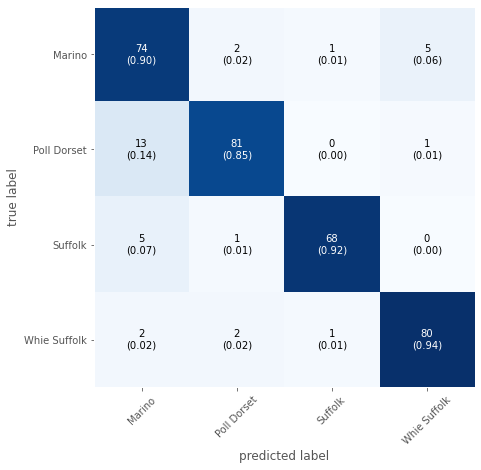

In [32]:
''' confusion matrix '''
cm = confusion_matrix(y_test_vgg,y_pred)
plot_confusion_matrix(conf_mat=cm, show_normed=True, class_names = ["Marino","Poll Dorset","Suffolk",
                                                                    "Whie Suffolk"],figsize=(8,7));

In [43]:
def plot_acc_loss_resnet(history, epochs):
    
    ''' Validation and Training accuracy graph'''
    plt.style.use("ggplot")
    plt.figure(figsize=(12,6))
    epochs = np.arange(1,epochs+1)
    plt.subplot(2,2,1)
    plt.plot(epochs,history.history["accuracy"],"go-")
    plt.plot(epochs,history.history["val_accuracy"],"ro-")
    plt.title("Model Accuracy Curve for ResNet50")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"],loc = "upper left")
    
    ''' Validation and Training loss graph'''
    plt.subplot(2,2,2)
    plt.plot(epochs,history.history["loss"],"go-")
    plt.plot(epochs,history.history["val_loss"],"ro-")
    plt.title("Model Loss Curve for ResNet50")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Train","Val"],loc = "upper left")
    
    plt.show()
    

In [44]:
def plot_acc_loss_vgg(history,epochs):   
    ''' Validation and Training accuracy graph'''
    plt.style.use("ggplot")
    plt.figure(figsize=(12,6))
    epochs = np.arange(1,epochs+1)
    plt.subplot(1,2,1)
    plt.plot(epochs, history.history["accuracy"],"go-")
    plt.plot(epochs, history.history["val_accuracy"],"ro-")
    plt.title("Model Accuracy Curve for VGG19")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"],loc = "upper left")
    
    ''' Validation and Training loss graph'''
    plt.subplot(1,2,2)
    plt.plot(epochs,history.history["loss"],"go-")
    plt.plot(epochs,history.history["val_loss"],"ro-")
    plt.title("Model Loss Curve for VGG19")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Train","Val"],loc = "upper left")
    plt.show()

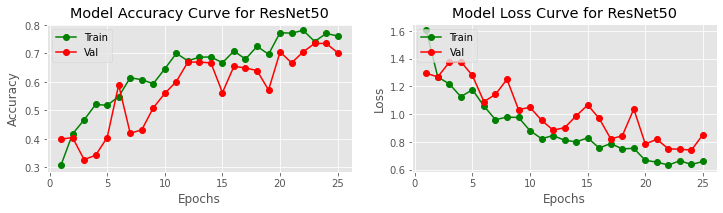

In [45]:
plot_acc_loss_resnet(history, 25)

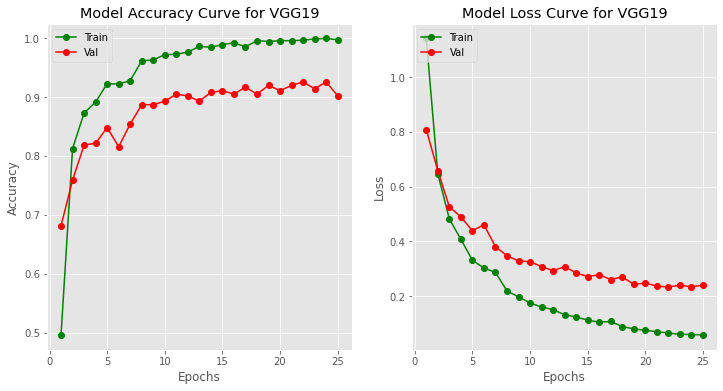

In [46]:
plot_acc_loss_vgg(history2, 25)

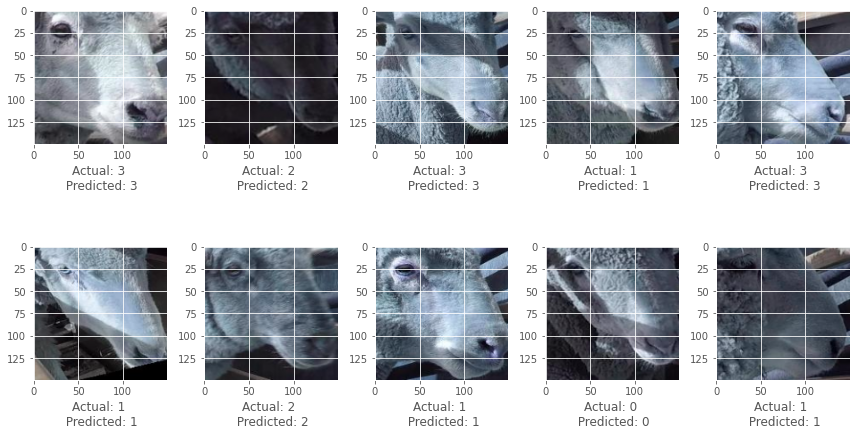

In [48]:
''' plotting some predicted and actual images '''

for i in range(10):
    plt.figure(figsize=(12,7))
    idx = random.randint(0,len(y_test_vgg))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(X_test[idx])
    plt.xlabel(f"Actual: {y_test_vgg[idx]} \n Predicted: {y_pred[idx]}")
    
plt.tight_layout()
plt.show()
    